In [9]:
using Pkg
Pkg.activate("..")
using MFDecoupling

  Activating project at `~/Codes/MFDecoupling.jl`


In [10]:
fp = "/home/julisn/Hamburg/Projects/MFDecoupling/data"
fpout = "/tmp"
fp1 = joinpath(fp,"CK_U0.1V0.5.dat")
fp2 = joinpath(fp,"rho_U0.1V0.5.dat")

LL::Int = 1000
Uin::Float64 = 0.1
Vin::Float64 = 0.5
VV::Float64 = 0.5
tmin::Float64 = 0.0
tmax::Float64 = 0.1
tspan = (tmin,tmax)

UQuench = 1.0
VQuench = 0.5;

In [11]:
include("Time_evolution_old.jl")

Reading File 1
Reading File 2
LL = 1000
(2002, 2002)


ODE   0%|                                               |  ETA: N/A
ODE  56%|██████████████████████████▍                    |  ETA: 0:00:00


Errors:
nothing
Algorithm Details:
CompositeAlgorithm(; algs = (Tsit5(; stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false),), ImplicitEuler(; linsolve = KrylovJL{typeof(Krylov.gmres!), Int64, Tuple{}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}}(Krylov.gmres!, 0, 0, (), Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}()), nlsolve = NLNewton{Rational{Int64}, Rational{Int64}, Rational{Int64}, Rational{Int64}}(1//100, 10, 1//5, 1//5, false, true, 0//1), precs = DEFAULT_PRECS, extrapolant = constant, controller = PI,)), choice_function = OrdinaryDiffEq.AutoSwitchCache{Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, ImplicitEuler{0, false, KrylovJL{typeof(Krylov.gmres!), Int64, Tuple{}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}}, NLNewton{Rational{Int64}, Rational{Int64}, Rational{Int64}, Rational{Int64}}, typeof(OrdinaryDiffEq.DEFAULT_PRECS), Va

ODE 100%|███████████████████████████████████████████████| Time: 0:00:00
ODE 100%|███████████████████████████████████████████████| Time: 0:00:00


In [23]:
X0_real_new, rhsf! = setup_calculation(fp1, fp2, LL)
X0_new, rhsf_c! = setup_calculation(fp1, fp2, LL; mode=:complex);
idxs_list = collect(1:11)
p_0  = [LL, UQuench, VQuench, 0.0, 0.0];
prob_c = MFDecoupling.ODEProblem(rhsf_c!,X0_new,tspan,p_0);
prob_r = MFDecoupling.ODEProblem(rhsf!,X0_real_new,tspan,p_0);
rtol = 1e-9
atol = 1e-9
linsolve = MFDecoupling.KrylovJL_GMRES()

use_real = false
alg_impl1_c = MFDecoupling.AutoTsit5(MFDecoupling.KenCarp47(autodiff=use_real, linsolve = linsolve); maxnonstiffstep=3, stiffalgfirst=true)
alg_impl2_c = MFDecoupling.AutoTsit5(MFDecoupling.ImplicitEuler(autodiff=use_real, linsolve = linsolve))
alg_impl3_c = MFDecoupling.KenCarp47(autodiff=use_real, linsolve = linsolve);
alg_impl4_c = MFDecoupling.TRBDF2(autodiff=use_real, linsolve = linsolve);
use_real = true
alg_impl1_r = MFDecoupling.AutoTsit5(MFDecoupling.KenCarp47(autodiff=use_real, linsolve = linsolve); maxnonstiffstep=3, stiffalgfirst=true)
alg_impl2_r = MFDecoupling.AutoTsit5(MFDecoupling.ImplicitEuler(autodiff=use_real, linsolve = linsolve))
alg_impl3_r = MFDecoupling.KenCarp47(autodiff=use_real, linsolve = linsolve);
alg_impl4_r = MFDecoupling.TRBDF2(autodiff=use_real, linsolve = linsolve);

Reading File 1
Reading File 2
Reading File 1
Reading File 2


In [13]:
nh = trunc(Int,length(X0_real_new)/2)
XT = X0_real_new[1:nh] .+ 1im .* X0_real_new[nh+1:end];
t1 = sum(abs.(X0_new .- X0))
t2 = sum(abs.(XT .- X0))
println("Checksum (0 -> success) X0 new vs old: $t1 (complex), $t2 (real)")

Checksum (0 -> success) X0 new vs old: 0.0 (complex), 0.0 (real)


In [6]:
@time sol1_r = MFDecoupling.solve(prob_r, alg_impl1_r; abstol=rtol, reltol=atol, save_idxs=idxs_list, save_everystep=false) #, saveat=tlist);
@time sol2_r = MFDecoupling.solve(prob_r, alg_impl2_r; abstol=rtol, reltol=atol, save_idxs=idxs_list, save_everystep=false) #, saveat=tlist);
@time sol3_r = MFDecoupling.solve(prob_r, alg_impl3_r; abstol=rtol, reltol=atol, save_idxs=idxs_list, save_everystep=false) #, saveat=tlist);
@time sol4_r = MFDecoupling.solve(prob_r, alg_impl4_r; abstol=rtol, reltol=atol, save_idxs=idxs_list, save_everystep=false) #, saveat=tlist);


 18.745007 seconds (4.67 M allocations: 3.495 GiB, 0.70% gc time, 50.05% compilation time)
  3.660842 seconds (1.99 M allocations: 772.800 MiB, 83.49% compilation time)
 12.939066 seconds (2.57 M allocations: 3.210 GiB, 0.65% gc time, 24.57% compilation time)
 11.787325 seconds (2.09 M allocations: 2.762 GiB, 0.45% gc time, 25.22% compilation time)


retcode: Success
Interpolation: 1st order linear
t: 2-element Vector{Float64}:
 0.0
 0.1
u: 2-element Vector{Vector{Float64}}:
 [0.2322995282445528, 0.24937259933608286, 0.24937259933608286, 0.2322995282445528, 0.26770047175544676, 0.26770047175544676, 0.24937259933608286, 0.26770047175544676, 0.24937259933608286, 0.2322995282445528, -0.3522117980368747]
 [0.23190456311584387, 0.24909225295857146, 0.24909225295857146, 0.23190456311584387, 0.2680954368841556, 0.2680954368841556, 0.24909225295857146, 0.2680954368841556, 0.24909225295857146, 0.23190456311584387, -0.3522116227178091]

In [7]:
@time sol1_c = MFDecoupling.solve(prob_c, alg_impl1_c; abstol=rtol, reltol=atol, save_idxs=idxs_list, save_everystep=false) #, saveat=tlist);
@time sol2_c = MFDecoupling.solve(prob_c, alg_impl2_c; abstol=rtol, reltol=atol, save_idxs=idxs_list, save_everystep=false) #, saveat=tlist);
@time sol3_c = MFDecoupling.solve(prob_c, alg_impl3_c; abstol=rtol, reltol=atol, save_idxs=idxs_list, save_everystep=false) #, saveat=tlist);
@time sol4_c = MFDecoupling.solve(prob_c, alg_impl4_c; abstol=rtol, reltol=atol, save_idxs=idxs_list, save_everystep=false) #, saveat=tlist);

 21.373783 seconds (2.64 M allocations: 3.338 GiB, 0.52% gc time, 22.41% compilation time)
  3.834857 seconds (1.55 M allocations: 705.452 MiB, 8.69% gc time, 74.36% compilation time)
 19.187707 seconds (2.32 M allocations: 3.164 GiB, 0.43% gc time, 16.33% compilation time)
 17.936915 seconds (2.11 M allocations: 2.733 GiB, 2.41% gc time, 16.55% compilation time)


retcode: Success
Interpolation: 1st order linear
t: 2-element Vector{Float64}:
 0.0
 0.1
u: 2-element Vector{Vector{ComplexF64}}:
 [0.2322995282445528 + 0.0im, 0.24937259933608286 + 0.0im, 0.24937259933608286 + 0.0im, 0.2322995282445528 + 0.0im, 0.26770047175544676 + 0.0im, 0.26770047175544676 + 0.0im, 0.24937259933608286 + 0.0im, 0.26770047175544676 + 0.0im, 0.24937259933608286 + 0.0im, 0.2322995282445528 + 0.0im, -0.3522117980368747 + 0.0im]
 [0.23190456175573823 - 5.788877015544251e-16im, 0.24909225199456028 - 0.011207350620287427im, 0.2490922519937547 - 0.011207350610684246im, 0.2319045617547697 + 3.9376163828663116e-13im, 0.2680954382381999 - 6.92522817755792e-14im, 0.2680954382445555 - 7.695533738659397e-14im, 0.2490922519933498 + 0.01120735061905946im, 0.2680954382388828 - 6.768565527636788e-14im, 0.24909225199459475 + 0.01120735060979608im, 0.2319045617552805 + 1.3723771481222944e-13im, -0.3522116235696508 - 8.360424743517993e-14im]

In [8]:
t1_r = sum(abs.(sol1_r.u[2,1] .- sol2_r.u[2,1]))
t2_r = sum(abs.(sol1_r.u[2,1] .- sol3_r.u[2,1]))
t3_r = sum(abs.(sol1_r.u[2,1] .- sol4_r.u[2,1]))
println("Checksums (0 -> success) $t1_r, $t2_r, $t3_r")

Checksums (0 -> success) 4.6082387905599376e-11, 0.0, 3.119756133429519e-7


In [9]:
t1_rc = sum(abs.(sol1_r.u[2,1] .- real.(sol1_c.u[2,1])))
t1_c = sum(abs.(sol1_c.u[2,1] .- sol2_c.u[2,1]))
t2_c = sum(abs.(sol1_c.u[2,1] .- sol3_c.u[2,1]))
t3_c = sum(abs.(sol1_c.u[2,1] .- sol4_c.u[2,1]))
println("Checksums (0 -> success) $t1_rc, $t1_c, $t2_c, $t3_c")

Checksums (0 -> success) 6.203640379176534e-11, 7.404551094188564e-10, 0.0, 2.0735323488889955e-6


In [34]:
tmin::Float64 = 0.0
tmax::Float64 = 50.0
tspan = (tmin,tmax)

UQuench = 1.0
VQuench = 0.5;
tlist = LinRange(10.0,50,100)
prob_r = MFDecoupling.ODEProblem(rhsf!,X0_real_new, tspan, p_0);
@time sol2_r = MFDecoupling.solve(prob_r, alg_impl2_r; abstol=rtol, reltol=atol, save_idxs=idxs_list, saveat=tlist);

 39.490537 seconds (281 allocations: 641.546 MiB, 0.31% gc time, 0.02% compilation time)


In [35]:
sol2_r.stats

DiffEqBase.Stats
Number of function 1 evaluations:                  1029
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          171
Number of rejected steps:                          0
Maximum eigenvalue recorded:                       1

In [36]:
using Plots

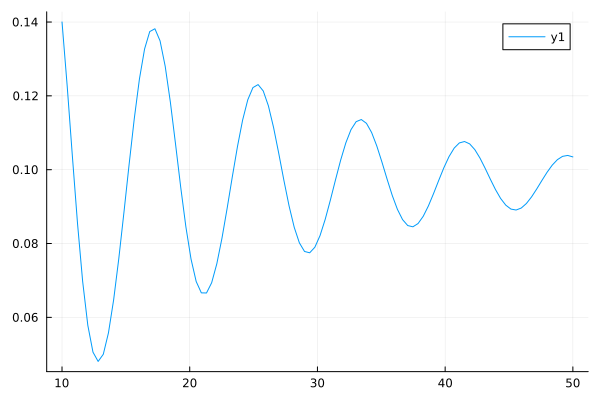

In [37]:
plot(tlist,sol2_r[1,:])

In [28]:
sol2_r[5,:]

100-element Vector{Float64}:
 0.402054953816947
 0.4023059172341137
 0.4028292304008784
 0.4032462331653885
 0.40329320610387226
 0.40298237333064285
 0.40256064267503716
 0.40231973992752773
 0.40239862017473127
 0.4027082626572085
 0.4030167121883289
 0.40311983984445476
 0.4029732821745995
 ⋮
 0.4027579828264866
 0.40276020466768914
 0.40276251291881493
 0.4027633631275319
 0.402762360981712
 0.4027603897328229
 0.40275885969483705
 0.40275873578869936
 0.4027599409724036
 0.4027615169375974
 0.4027623820690679
 0.4027620464898006